In [61]:
from keras.datasets import mnist
(train_imgs,train_labels),(test_imgs,test_labels)=mnist.load_data()

In [62]:
import tensorflow as tf
import matplotlib.pyplot as mplt

784 (28, 28)


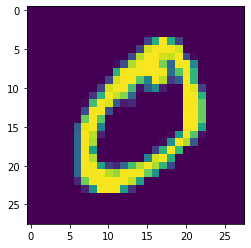

In [63]:
print(train_imgs[1].size,train_imgs[1].shape)

mplt.imshow(train_imgs[1])
mplt.show()

In [64]:
from keras.utils import to_categorical
train_imgs = train_imgs.reshape((60000, 28, 28, 1))
train_imgs = train_imgs.astype('float32') / 255
test_imgs = test_imgs.reshape((10000, 28, 28, 1))
test_imgs = test_imgs.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(train_imgs.shape)
print(test_imgs.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [65]:
#dividing the 10000 test images to validation and test sets with 5000 examples in each

val_imgs = test_imgs[:5000]
remain_test_imgs = test_imgs[5000:]

val_labels = test_labels[:5000]
remain_test_labels = test_labels[5000:]

In [66]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

In [68]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)               

In [69]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [70]:
model_history=model.fit(train_imgs, train_labels, epochs=5, batch_size=128,validation_data=(val_imgs,val_labels))

Train on 60000 samples, validate on 5000 samples
Epoch 1/5
60000/60000 [==============================] - 44s 739us/sample - loss: 0.2373 - accuracy: 0.9258 - val_loss: 0.0775 - val_accuracy: 0.9734
Epoch 2/5
60000/60000 [==============================] - 45s 753us/sample - loss: 0.0538 - accuracy: 0.9831 - val_loss: 0.0669 - val_accuracy: 0.9768
Epoch 3/5
60000/60000 [==============================] - 47s 784us/sample - loss: 0.0368 - accuracy: 0.9887 - val_loss: 0.0498 - val_accuracy: 0.9858
Epoch 4/5
60000/60000 [==============================] - 49s 808us/sample - loss: 0.0268 - accuracy: 0.9914 - val_loss: 0.0372 - val_accuracy: 0.9860
Epoch 5/5
60000/60000 [==============================] - 51s 852us/sample - loss: 0.0211 - accuracy: 0.9934 - val_loss: 0.0556 - val_accuracy: 0.9836


In [71]:
test_loss, test_acc = model.evaluate(remain_test_imgs, remain_test_labels)

5000/5000 [==============================] - 1s 174us/sample - loss: 0.0170 - accuracy: 0.9952
